<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import torch
from torch import nn
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib import patches, gridspec
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

import matplotlib.font_manager

import matplotlib.pyplot as plt

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}", r'\usepackage{amssymb}', r'\usepackage{amsmath}',
                                    r'\usepackage{wasysym}']
#Options
params = {'text.usetex' : True,
          'font.size' : 16,
          'font.family' : 'sans-serif',
          'font.serif' : 'Computer Modern Sans serif',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
sns.set_style("darkgrid")


plot_colors = [
    "red",  # Color of repeating class 
    "limegreen",  # Color Left
    "royalblue",  # "#39ED48",  # Color Right
]
c_names = [
    "Red",
    "Blue", # -.- inverted from above
    "Green",
]



/BS/restricted_networks/work/anaconda3/envs/torch1.6/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


In [2]:
# Define loss function
the_loss = nn.BCEWithLogitsLoss(reduction="none")
red_center = np.array([.25, 1]).reshape(1, 2)
red_center /= np.linalg.norm(red_center, axis=1, keepdims=True)
green_center = np.array([.85, .25]).reshape(1, 2)
green_center /= np.linalg.norm(green_center, axis=1, keepdims=True)
blue_center = np.array([-.25, 1]).reshape(1, 2)
blue_center /= np.linalg.norm(blue_center, axis=1, keepdims=True)
angles = torch.tensor([[np.cos(np.pi*x), np.sin(np.pi*x)] for x in np.linspace(0, 1, 100)])
data2 = .05* np.random.randn(10, 2) + np.array([.25, 1]).reshape(1, 2)
data3 = data2 * np.array([[-1, 1]])
data1 = .05* np.random.randn(10, 2) + green_center

_data2 = torch.from_numpy(data2)
_data3 = torch.from_numpy(data3)
_data1 = torch.from_numpy(data1)

outputs_blue = {}
outputs_green = {}
BS = [1, 2, 50]#.astype(int)
for B in BS:
    output1 = angles @ (_data1/_data1.norm(p=2, dim=1, keepdim=True)).T
    output1 = (output1.abs()**B) * output1.sign() * _data1.norm(p=2, dim=1, keepdim=True).T
    output2 = angles @ (_data2/_data2.norm(p=2, dim=1, keepdim=True)).T
    output2 = (output2.abs()**B) * output2.sign() * _data2.norm(p=2, dim=1, keepdim=True).T
    output3 = angles @ (_data3/_data3.norm(p=2, dim=1, keepdim=True)).T
    output3 = (output3.abs()**B) * output3.sign() * _data3.norm(p=2, dim=1, keepdim=True).T
           
    output = torch.cat([output2, output1], dim=1)
    output /= 20 * (_data1.norm(p=2, dim=1).sum() + _data2.norm(p=2, dim=1).sum())
    outputs_blue[B] = output
    output = torch.cat([output2, output3], dim=1)
    output /= 20 * (_data1.norm(p=2, dim=1).sum() + _data3.norm(p=2, dim=1).sum())
    outputs_green[B] = output


Text(0.5, 0, 'Arrows denote the direction of $\\mathbf w$ (x-axis)')

/BS/restricted_networks/work/anaconda3/envs/torch1.6/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/BS/restricted_networks/work/anaconda3/envs/torch1.6/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


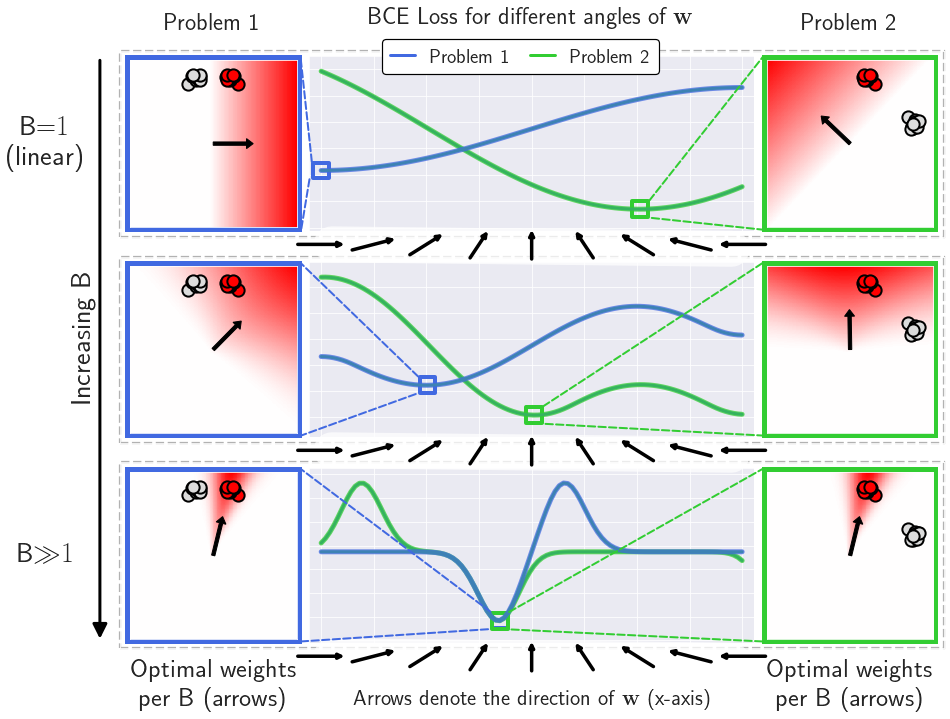

In [3]:

sns.set_style("darkgrid")
fig = plt.figure(figsize=(16 * .9, 12 * .9), constrained_layout=True)
offset = .5025

gs = gridspec.GridSpec(nrows=3, ncols=3,
                       width_ratios=[1.5, 4, 1.5], height_ratios=[1, 1, 1], wspace=0.05,
                       hspace=0.175)


axes = np.array([fig.add_subplot(gs[i, 1]) for i in range(3)])
arrows = []
arrows2 = []
minima_green = []
minima_blue = []
bce_axes = axes
# Filling in the losses
for i, B in enumerate(BS):
    ax = axes[i]
    #     print(ax.get_aspect())
    ax.set_aspect("auto")

    # ["Red vs.~Orange", "Red vs.~{}".format(c_names[2])]
    loss_green = the_loss(outputs_green[B],
                          torch.cat([torch.ones_like(output2),
                                     torch.zeros_like(output1)], dim=1)).mean(1)

    loss_blue = the_loss(outputs_blue[B],
                         torch.cat([torch.ones_like(output2),
                                    torch.zeros_like(output1)], dim=1)).mean(1)
    x_green = np.linspace(0, 180, 100)[loss_green.argmin()]
    min_green = loss_green.min()
    minima_green.append((min_green, x_green))
    x_blue = np.linspace(0, 180, 100)[loss_blue.argmin()]
    min_blue = loss_blue.min()
    minima_blue.append((min_blue, x_blue))
    arrows2.append((0, 0, *(0.5 * np.array([np.cos(x_green*np.pi/180), np.sin(x_green*np.pi/180)]))))
    arrows.append((0, 0, *(0.5 * np.array([np.cos(x_blue*np.pi/180), np.sin(x_blue*np.pi/180)]))))
    p_length = 2
    plot_blue = ax.plot(np.linspace(0, 180, 100)[:], loss_blue,
                        color=plot_colors[2], lw=3, alpha=1, label="Red vs.~{}".format(c_names[2]))

    plot_green = ax.plot(np.linspace(0, 180, 100)[:], loss_green,
                         color=plot_colors[1], lw=3, alpha=1, label="Red vs.~{}".format(c_names[1]))

    ax.plot(np.linspace(0, 180, 100)[:], loss_blue,
            color=plot_colors[1], lw=5, alpha=.75, label="Red vs.~{}".format(c_names[2]))

    ax.plot(np.linspace(0, 180, 100)[:], loss_green,
            color=plot_colors[2], lw=5, alpha=.75, label="Red vs.~{}".format(c_names[1]))
    
    ax.scatter(x_green, min_green, marker="s", s=250, edgecolor=plot_colors[2], 
               facecolor="none", lw=4)
    ax.scatter(x_blue, min_blue, marker="s", s=250, edgecolor=plot_colors[1], 
               facecolor="none", lw=4)
            
    ax.tick_params(
        axis='y',  # changes apply to the x-axis
        which='both',  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        left=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelleft=False)  # plt.grid()
    lim = ax.get_ylim()
    lim = lim[0] - (lim[1] - lim[0]) * .05, lim[1] + (lim[1] - lim[0]) * .05,

    ax.margins(y=1.2)

    ax.set_ylim(*lim)
    
    ax.tick_params(
        axis='y',  # changes apply to the x-axis
        which='both',  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelright=False)
    if i == 0:
        ax.set_title("BCE Loss for different angles of $\mathbf w$", fontsize=24,
                     fontweight="bold", pad=32)
    #     if i < 2:
    ax.tick_params(
        axis='x',  # changes apply to the x-axis
        which='both',  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        left=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelbottom=False)
    if i == 0 or True:
#         ax.set_title("Direction of weight vector $\mathbf w$", fontsize=24, y=1.4)

        ax.set_xticks([0, 45, 90, 135, 180])
        ax.set_xticklabels([0, 45, 90, 135, 180])
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xscale = xlim[1] - xlim[0]
        yscale = xlim[1] - xlim[0]
        off = -.03
        fig.patches.append(patches.ConnectionPatch((0.05, -.075), (.95, (-.1)),
                                                   coordsA=ax.transAxes,
                                                   coordsB=ax.transAxes,
                                                   edgecolor=(1, 1, 1, .75),
                                                    linewidth=36,
                                                  ))

        
        for angle in [0., 22.5, 45, 45 + 22.5, 90., 90 + 22.5, 135., 135 + 22.5, 180.]:
            rad = 2 * angle / 360 * np.pi
            ydelta = 15 / 180 * (lim[1] - lim[0]) * np.sin(rad) + (lim[1] - lim[0]) * .075
            xdelta = 2 * 10 * np.cos(rad)
            arrow = patches.ConnectionPatch(
                (angle-xdelta/2, lim[0] - ydelta),
                (angle-xdelta/2 + xdelta,
                 lim[0] + 2 * 15 / 180 * (lim[1] - lim[0]) * np.sin(rad) - ydelta),
                coordsA=ax.transData,
                coordsB=ax.transData,
                # Default shrink parameter is 0 so can be omitted
                edgecolor="black",
                facecolor="black",
                arrowstyle="-|>",  # "normal" arrow
                mutation_scale=10,  # controls arrow head size
                linewidth=3.5,
                #                 arrowidth=2
                #                 width=4
            )
            fig.patches.append(arrow)
    
    ax.set_xticks([0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180])
    ax.set_xlim(-5, 185)

    if i == 0 and False:
        ax.legend([mean_line_green, mean_line_blue, mean_line_red],
                  ["", "", "Mean class angles"],
                  ncol=3, loc="upper left", fontsize=20,
                  bbox_to_anchor=[.0, 1.025], handlelength=1.55,
                  columnspacing=0, handletextpad=.5, borderaxespad=.05, framealpha=1,
                  edgecolor="black",
                  facecolor="white"
                  ).get_frame().set_linewidth(1.2)
    if i == 0:
        pa1 = plt.plot(*(np.nan, np.nan), marker="",
                       #                           edgecolor="black",
                       color=plot_colors[2], lw=3, linestyle=(0, (2, 1)))
        pa2 = plt.plot(*(np.nan, np.nan), marker="",
                       #                           edgecolor="black",
                       color=plot_colors[1], lw=3, linestyle=(0, (2, 1)))

        pa1 = plt.plot((np.nan, np.nan), color="black")
        pa11 = patches.Rectangle((np.nan, np.nan), 6, .05, facecolor='red', lw=.5, edgecolor=plot_colors[2])
        pa2 = patches.Rectangle((np.nan, np.nan), 6, .05, facecolor='#39ED48', lw=.5, edgecolor=plot_colors[1])
        pa3 = patches.Rectangle((np.nan, np.nan), 6, .05, facecolor='#0C66F7', lw=.5, edgecolor=plot_colors[2])
        pa4 = patches.Rectangle((np.nan, np.nan), 6, .05, facecolor='white', lw=.5, alpha=0)

        ax.legend([
#             g1,
            plot_blue[0],
#             , g2,
#                    pa4, pa4,
#                    b1,
            plot_green[0],
#             b2
        ],
#                   ["", "", "{} vs.~{}".format(c_names[0], c_names[2]),
                  ["Problem 1",
                   "Problem 2"],
#                    "", "", "{} vs.~{}".format(c_names[0], c_names[1])],
                  ncol=8, loc="upper left", fontsize=20,
                  bbox_to_anchor=[.16, 1+.1],
                  handlelength=1.25,
                  #                   handleheight=.05,
                  columnspacing=1, handletextpad=.75, borderaxespad=.05, framealpha=1,
                  edgecolor="black",
                  facecolor="white"
                  ).get_frame().set_linewidth(1.2)

axes = np.array([fig.add_subplot(gs[i, 0]) for i in range(3)])
first_axes = axes
y_labels = ["B$=$$1$\n (linear)", "$B_2$$>$B$_1$", "B$\gg$$1$"]


colors = ["green", "white", plot_colors[0]]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
# Filling in the side plots to the left
for i, B in enumerate(BS):
    ax = axes[i]
    ax.set_aspect("equal")
    if i == 0:
        ax.set_title("Problem 1".format(c_names[0], c_names[2]), fontsize=24, pad=30)


    def z_func(x, y):
        grid = np.concatenate([x[None], y[None]], axis=0)
        grid_norm = np.linalg.norm(grid, 2, axis=0)
        cos = ((np.array((arrows2[i][-2:]) / np.sqrt(2))[:, None, None] * grid / grid_norm).sum(0))
        return (np.abs(cos) ** B * np.sign(cos) * grid_norm)


    x = np.arange(-1.0 / 2, 1.1 / 2, .005)
    y = np.arange(-1.0 / 2, 1.1 / 2, .005)
    X, Y = meshgrid(x, y)  # grid of point
    Z = z_func(X, Y)  # evaluation of the function on the grid
    vrange = np.max(np.abs(Z).flatten())
    if i < 3:
        im = ax.imshow(Z.clip(0), cmap=cmap, vmin=-vrange, vmax=vrange, extent=(-1.25, 1.25, 1.25, -1.25))  # drawing the function
    else:
        Z = Z.clip(None, 0) + saved.clip(0, None)
        im = ax.imshow((Z), cmap=cmap, vmin=-vrange, vmax=vrange, extent=(-1.25, 1.25, 1.25, -1.25))  # drawing the function
    if i == 2:
        saved = Z
        ax.set_xlabel("Optimal weights\n per B (arrows)", fontweight="bold", fontsize=26, labelpad=20)
    if i == 1 and False:
        ax.text(len(X) + 60, len(Y) / 2, "Increasing B", fontweight="bold", fontsize=24,
                rotation=270, horizontalalignment='center', verticalalignment='center')
    #         ax2.set_yticks([])

    #     if i == 0:
    #         ax.set_title("Linear (B=1)", fontsize=18, fontweight="bold")
    #     elif i < 3:
    #         ax.set_title("B={} {}".format(B, "" if B>1 else "(linear)"), fontsize=18, fontweight="bold")
    #     else:
    #         ax.set_title("B={} (2 units)".format(B), fontsize=18, fontweight="bold")
    ax.scatter(data3[:, 0], data3[:, 1], marker="o",
               color="gainsboro", edgecolor="black", linewidth=2, s=150)
    ax.scatter(data2[:, 0], data2[:, 1], marker="o",
               color=plot_colors[0], edgecolor="black", linewidth=2, s=150)
#     if i == 3:
#         ax.arrow(*5 * arrows2[i - 1], head_width=2, head_length=1, fc=plot_colors[1], ec='black', width=.5)
#         ax.arrow(*5 * arrows2[i][:2], *(-5 * np.array(arrows2[i][-2:]))
#                  , head_width=16, head_length=1, fc='#39ED48', ec='black', width=.5)
#     else:
    ax.arrow(*arrows2[i], head_width=.15, head_length=.1, fc='black', ec='black', width=.05)
    if i != 1:
        ax.text(-.5, .5, y_labels[i], fontsize=28, 
                horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)    
#     ax.invert_yaxis()
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_edgecolor(plot_colors[2])
    ax.patch.set_linewidth(10)

axes = np.array([fig.add_subplot(gs[i, 2]) for i in range(3)])

plt.figtext(0.08, .44, "Increasing B", ha="center", rotation=90, fontsize=28,)

# Filling in the side plots to the right
second_axes = axes
for i, B in enumerate(BS):
    ax = axes[i]
    if i == 0:
        ax.set_title("Problem 2".format(c_names[0], c_names[1]), fontsize=24, pad=30)


    def z_func(x, y):
        grid = np.concatenate([x[None], y[None]], axis=0)
        grid_norm = np.linalg.norm(grid, 2, axis=0)
        cos = ((np.array((arrows[i][-2:]) / np.sqrt(2))[:, None, None] * grid / grid_norm).sum(0))
        return (np.abs(cos) ** B * np.sign(cos) * grid_norm)


    x = np.arange(-1.0 / 2, 1.1 / 2, .005)
    y = np.arange(-1.0 / 2, 1.1 / 2, .005)
    X, Y = meshgrid(x, y)  
    Z = z_func(X, Y)  
    vrange = np.max(np.abs(Z).flatten())
    if i < 3:
        im = ax.imshow(Z.clip(0), cmap=cmap, vmin=-vrange, vmax=vrange, extent=(-1.25, 1.25, 1.25, -1.25))  # drawing the function
    else:
        Z = Z.clip(None, 0) + saved.clip(0, None)
        im = ax.imshow((Z), cmap=cmap, vmin=-vrange, vmax=vrange, extent=(-1.25, 1.25, 1.25, -1.25))  # drawing the function
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)
    if i == 2:
        saved = Z
        ax.set_xlabel("Optimal weights\n per B (arrows)", fontweight="bold", fontsize=26, labelpad=20)

    ax.scatter(data1[:, 0], data1[:, 1], marker="o",
               color="gainsboro", edgecolor="black", linewidth=2, s=150)
    ax.scatter(data2[:, 0], data2[:, 1], marker="o",
               color=plot_colors[0], edgecolor="black", linewidth=2, s=150)
    ax.arrow(*arrows[i], head_width=.15, head_length=.1, fc='black', ec='black', width=.05)

#     ax.invert_yaxis()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_edgecolor(plot_colors[1])
    ax.patch.set_linewidth(10)

cmap = matplotlib.cm.get_cmap('hot')

# Frame around rows
for i in range(3):
    # outer
    outergs = gridspec.GridSpec(1, 1, wspace=0, hspace=0,
                                top=0)
    pos = axes[i].get_position(False)
    outergs.update(bottom=pos.y0 - 0.0125, left=.115,
                   top=pos.y1 + 0.0125, right=.91)
    outerax = fig.add_subplot(outergs[0])
    outerax.tick_params(axis='both', which='both', bottom=0, left=0,
                        labelbottom=0, labelleft=0)
    outerax.set_facecolor("white")
    outerax.patch.set_edgecolor("black")
    outerax.patch.set_linewidth(2.25)
    outerax.patch.set_linestyle("dashed")
    outerax.patch.set_alpha(0.3)
    outerax.grid(False)
    outerax.set_zorder(-10)

    
# Connection between sides and center
for minima, sign, axes in [(minima_green, 1, first_axes), (minima_blue, -1, second_axes)]:
    for i, minimum in enumerate(minima):
        delta = bce_axes[i].get_ylim()
        delta = 0.05*(delta[1]-delta[0])
        arrow = patches.ConnectionPatch(
                    (minimum[1]- sign*4, minimum[0]+delta),
                    (sign*1.31, 1.3),
                    coordsA=bce_axes[i].transData,
                    coordsB=axes[i].transData,
                    color=plot_colors[2 + min(0, sign)],
                    linestyle="--",  # "normal" arrow
                    linewidth=2,
                    )
        fig.patches.append(arrow)
        arrow = patches.ConnectionPatch(
                    (minimum[1]-sign*5, minimum[0]-delta),
                    (sign*1.32, -1.29),
                    coordsA=bce_axes[i].transData,
                    coordsB=axes[i].transData,
                    color=plot_colors[2 + min(0, sign)],
                    linestyle="--",  # "normal" arrow
                    linewidth=2,
                    )
        fig.patches.append(arrow)


arrow = patches.ConnectionPatch(
    (-1.7, 1.25),
    (-1.7, -1.25),
    coordsA=first_axes[0].transData,
    coordsB=first_axes[-1].transData,
    color="black",
    arrowstyle="-|>", 
    mutation_scale=30,
    linewidth=3,
)
fig.patches.append(arrow)

bce_axes[2].set_xlabel("Arrows denote the direction of $\mathbf w$ (x-axis)", fontsize=22, labelpad=45)